In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
train_label = pd.read_csv('/Users/hongseoklee/VSCodeWorkspace/AIs/NCSoft/final_data/train/train_label.csv')
print(train_label)


train_activity = pd.read_csv('/Users/hongseoklee/VSCodeWorkspace/AIs/NCSoft/final_data/train/train_activity.csv')
print(train_activity)


                                                  acc_id     label
0      b8fbf3f6a70e3f36843bffc70c18ff51a0d755a87616ec...      week
1      ed500c4957956b3e99dc3985666850b582f812405eefb6...      week
2      acc6afa23a6bf15e18151e4794c7789225ef9d682f473c...      week
3      34095a3c9a2937ced3ea3fd75e22ce177dc5879d2a53f7...      week
4      26f3db6e8817a93c4ceda9a16f0832945e43d950b95882...      week
...                                                  ...       ...
99995  da6d33b03968d8e35821f6eb88ad22e12e37aa8867084e...  retained
99996  676c944f4b6ae63818b3cad824a61233690f16a2275d5d...  retained
99997  695e1f28e234fc4cc53085e332fa7a76d7895ca4cc745b...  retained
99998  0c87fabaad5542e533f958a1d6fd739993b94e95e00989...  retained
99999  47ff575cb94019df5695c5d81ec285b0d801607b2a8697...  retained

[100000 rows x 2 columns]
        wk                                             acc_id  cnt_dt  \
0        7  3dc6f2875dc6e6f35b9e2bdb25b391a8003386ff23becd...       4   
1        8  3dc6f2875dc

In [3]:
df = pd.merge(left = train_label , right = train_activity, how = "inner", on = "acc_id")


categorical_features = ["acc_id"]
# for문을 사용하여 Label Encoding 적용

# 원하는 라벨 순서로 fit 수행

label_encoder = LabelEncoder()

# 원하는 라벨 순서 정의
label_mapping = {'week':0, 'month':1, '2month':2, 'retained':3}

# 데이터프레임 열에 매핑 적용
df['label'] = df['label'].map(label_mapping)


for column in categorical_features:
    df[column] = label_encoder.fit_transform(df[column])





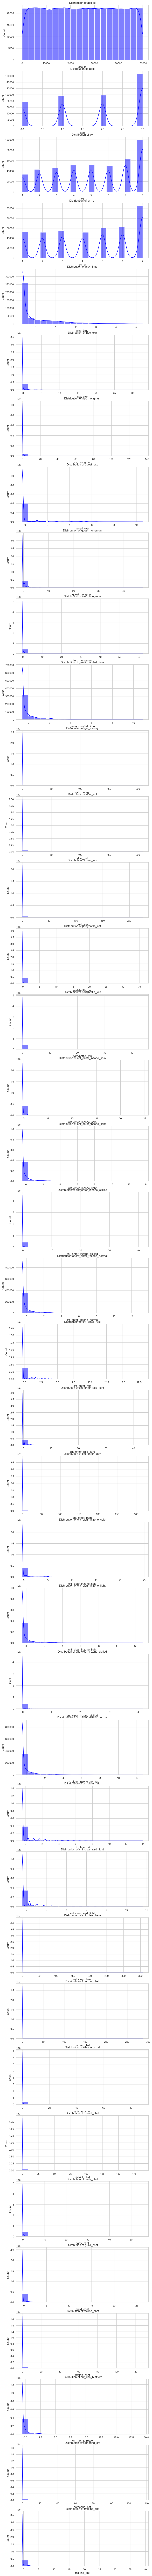

In [4]:
# 그래프 크기를 자동 조절하도록 설정
sns.set(style="whitegrid")
plt.figure(figsize=(10, len(df.columns)*5))

# 각 연속형 피처에 대한 데이터 분포를 세로로 나열하여 그래프로 나타내기
for i, column in enumerate(df.columns):
    plt.subplot(len(df.columns), 1, i+1)
    sns.histplot(df[column], kde=True, color='blue', bins=20)
    plt.title(f'Distribution of {column}')

# 전체 그래프 보여주기
plt.show()

In [5]:
train_x = df.drop(labels = ["label", "acc_id"], axis = 1)
train_y = df["label"]

# 클래스별 갯수 계산
class_counts = train_y.value_counts()
# 결과 출력
print(class_counts)


columns = train_x.columns


RF_C = RandomForestClassifier(n_estimators = 10, verbose=2)
RF_R = RandomForestRegressor(n_estimators = 10, verbose=2)

label
3    167110
2     98642
1     97473
0     77098
Name: count, dtype: int64


In [6]:
# 데이터 프레임에서 특성 간의 상관계수 계산
correlation_matrix = df.corr()

# 결과 출력
print("상관계수 행렬:\n", correlation_matrix)



model_c = RF_C.fit(train_x, train_y)
#model_r = RF_R.fit(train_x, train_y)

feature_importance = RF_C.feature_importances_

# Feature Importance를 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({'Feature': columns, 'Importance': feature_importance})

# Feature Importance를 Importance 기준으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = True)

상관계수 행렬:
                             acc_id     label        wk    cnt_dt  play_time  \
acc_id                    1.000000  0.001028  0.000454 -0.000586   0.000675   
label                     0.001028  1.000000 -0.147506  0.272843   0.044190   
wk                        0.000454 -0.147506  1.000000 -0.089580   0.007665   
cnt_dt                   -0.000586  0.272843 -0.089580  1.000000   0.502922   
play_time                 0.000675  0.044190  0.007665  0.502922   1.000000   
npc_exp                   0.002620 -0.162179  0.088965  0.055500   0.484219   
npc_hongmun               0.000107  0.136553 -0.043955  0.275562   0.390000   
quest_exp                 0.002764 -0.198523  0.090731  0.052468   0.504060   
quest_hongmun             0.001420 -0.006011 -0.028303  0.234280   0.636100   
item_hongmun              0.001677  0.236730 -0.034624  0.285504   0.294519   
game_combat_time         -0.001172 -0.022141  0.033922  0.441212   0.868094   
get_money                 0.004314  0.0118

In [7]:
threshold = 0.03
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
print(selected_features)


['party_chat', 'whisper_chat', 'cnt_use_buffitem', 'cnt_clear_raid_light', 'cnt_dt', 'wk', 'guild_chat', 'npc_hongmun', 'item_hongmun', 'get_money', 'quest_hongmun', 'game_combat_time', 'play_time']


In [8]:
### 재학습 ###
train_x = train_x[selected_features]
train_y = train_y

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


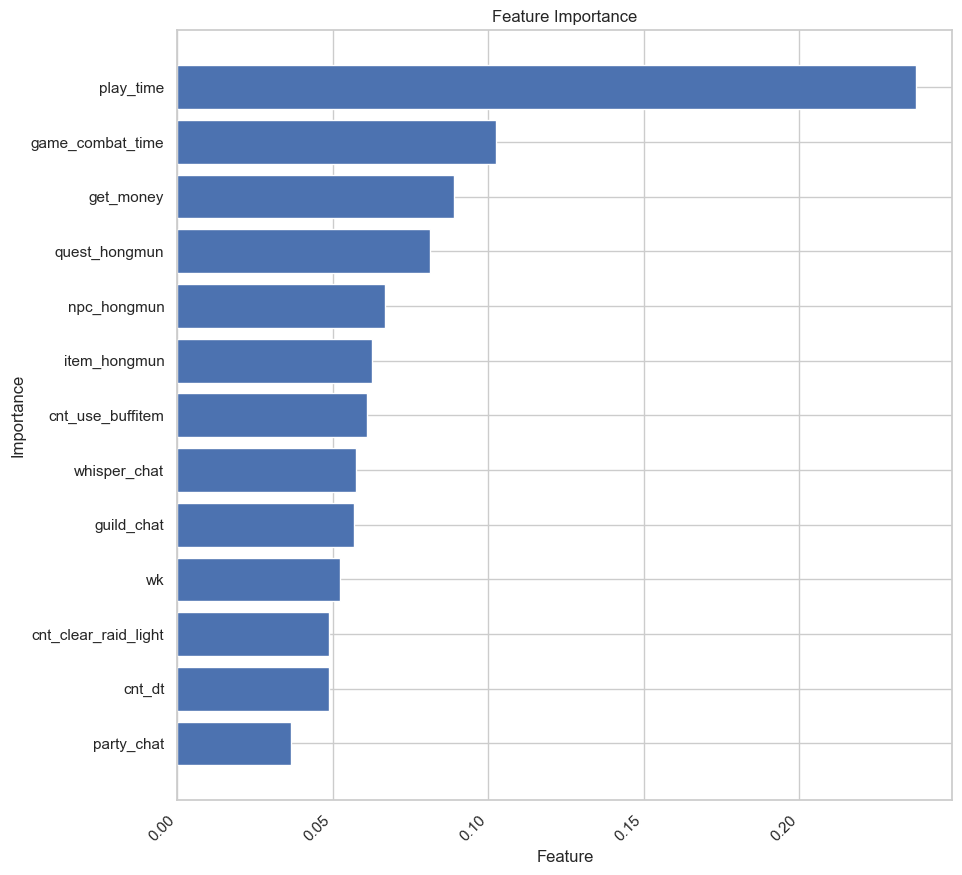

Accuracy: 0.6811786748424459
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75     15358
           1       0.64      0.50      0.57     19432
           2       0.55      0.59      0.57     19815
           3       0.74      0.81      0.77     33460

    accuracy                           0.68     88065
   macro avg       0.67      0.66      0.66     88065
weighted avg       0.68      0.68      0.68     88065



In [9]:
#검증 데이터셋 추출
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)


model_c = RF_C.fit(train_x, train_y)
feature_importance = RF_C.feature_importances_

# Feature Importance를 데이터프레임으로 정리
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})

# Feature Importance를 Importance 기준으로 정렬
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending = True)



plt.figure(figsize=(10, 10))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"])
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


# 훈련된 모델을 사용하여 검증 세트 예측
y_pred = RF_C.predict(val_x)

# 정확도 평가
accuracy = accuracy_score(val_y, y_pred)
print(f'Accuracy: {accuracy}')

# 분류 보고서 출력
print('Classification Report:')
print(classification_report(val_y, y_pred))